In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/wtitze/3E/main/Medals.xlsx'
medals = pd.read_excel(url)
medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [4]:
#eliminazione ultime 2 colonne
medals = medals.drop(columns=["Total","Rank by Total"] )
medals

,Rank,Team/NOC,Gold,Silver,Bronze
0,1,United States of America,39,41,33
1,2,People's Republic of China,38,32,18
2,3,Japan,27,14,17
3,4,Great Britain,22,21,22
4,5,ROC,20,28,23
...,...,...,...,...,...
88,86,Ghana,0,0,1
89,86,Grenada,0,0,1
90,86,Kuwait,0,0,1
91,86,Republic of Moldova,0,0,1


In [5]:
#eliminazione prima colonna
medals = medals.drop(columns=["Rank"] )
medals

,Team/NOC,Gold,Silver,Bronze
0,United States of America,39,41,33
1,People's Republic of China,38,32,18
2,Japan,27,14,17
3,Great Britain,22,21,22
4,ROC,20,28,23
...,...,...,...,...
88,Ghana,0,0,1
89,Grenada,0,0,1
90,Kuwait,0,0,1
91,Republic of Moldova,0,0,1


In [6]:
 medals.rename(columns={"Team/NOC" : "Team"},inplace = True) 
 medals

,Team,Gold,Silver,Bronze
0,United States of America,39,41,33
1,People's Republic of China,38,32,18
2,Japan,27,14,17
3,Great Britain,22,21,22
4,ROC,20,28,23
...,...,...,...,...
88,Ghana,0,0,1
89,Grenada,0,0,1
90,Kuwait,0,0,1
91,Republic of Moldova,0,0,1



1. visualizzare il numero di medaglie d’oro vinte dall’Italia


In [8]:
medals[medals["Team"] == "Italy"]["Gold"]

9    10
Name: Gold, dtype: int64

2. visualizzare il numero di medaglie d’oro delle nazioni che cominciano con la lettera F

In [9]:
medals[medals["Team"].str.startswith("F")][["Gold","Team"]]

,Gold,Team
7,10,France
59,1,Fiji
84,0,Finland


In [ ]:
import matplotlib.pyplot as plt


<BarContainer object of 3 artists>

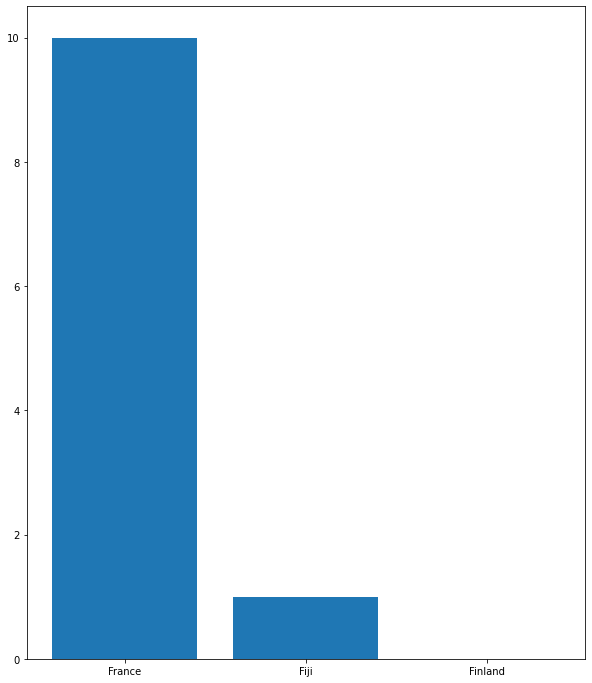

In [ ]:
#visualizzare il grafico delle medaglie d' oro vinte dalle nazioni che iniziano con la lettera F
x = list(medals[medals["Team"].str.startswith("F")]["Team"])
y = list(medals[medals["Team"].str.startswith("F")]["Gold"])
fig = plt.figure(figsize=(10,12))
ax = plt.axes()
plt.rcParams.update({'font.size' : 30})
ax.bar(x, y)

3. aggiungere una colonna contenente il numero totale di medaglie di ogni nazione. Chiamare la colonna “Total”

In [ ]:
medals["Total"] = medals["Gold"] + medals["Silver"] + medals["Bronze"]
medals

,Team,Gold,Silver,Bronze,Total
0,United States of America,39,41,33,113
1,People's Republic of China,38,32,18,88
2,Japan,27,14,17,58
3,Great Britain,22,21,22,65
4,ROC,20,28,23,71
...,...,...,...,...,...
88,Ghana,0,0,1,1
89,Grenada,0,0,1,1
90,Kuwait,0,0,1,1
91,Republic of Moldova,0,0,1,1


4. visualizzare la nazione che ha vinto più medaglie (in totale)

In [ ]:
medals[medals["Total"] == medals["Total"].max()][["Team"]]

,Team
0,United States of America


5.visualizzare il numero totale di medaglie vinte complessivamente da tutte le nazioni

In [ ]:
medals["Total"].sum()

1080

6.aggiungere una colonna contenente la percentuale di medaglie vinte da ogni nazione. Chiamare la colonna “Percentuale”

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/wtitze/3E/main/Teams.xlsx'
teams = pd.read_excel(url)
teams

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women
...,...,...,...,...
738,South Africa,Water Polo,South Africa,Women
739,Spain,Water Polo,Spain,Men
740,Spain,Water Polo,Spain,Women
741,United States,Water Polo,United States of America,Men



1. visualizzare il numero di squadre per ogni sesso


In [18]:
teams.loc[(teams['Event'] == 'Men').count() & (teams['Event'] == 'Women')].count()

Name          114
Discipline    114
NOC           114
Event         114
dtype: int64

2. visualizzare il numero di discipline a cui ha partecipato ogni nazione. Ordinare in ordine decrescente a partire dalla nazione che ha presentato più squadre. Contare insieme squadre maschili e femminili

In [24]:
teams.groupby("NOC")["Discipline"].count().sort_values(ascending = False)

NOC
Japan                       48
United States of America    47
Italy                       37
Germany                     36
Australia                   35
                            ..
Vietnam                      1
Honduras                     1
Ghana                        1
Estonia                      1
Angola                       1
Name: Discipline, Length: 84, dtype: int64

3. visualizzare il numero di nazioni che hanno partecipato alle varie discipline. Ordinare in ordine decrescente in base alla disciplina che ha avuto più squadre partecipanti

In [21]:
teams.groupby("Discipline")["NOC"].count().sort_values(ascending = False)

Discipline
Swimming               113
Athletics               79
Cycling Track           64
Archery                 53
Fencing                 52
Table Tennis            48
Beach Volleyball        48
Artistic Swimming       32
Football                28
Rugby Sevens            24
Artistic Gymnastics     24
Hockey                  24
Handball                24
Volleyball              24
Basketball              24
Water Polo              22
Triathlon               18
3x3 Basketball          16
Rhythmic Gymnastics     14
Baseball/Softball       12
Name: NOC, dtype: int64

4. visualizzare il nome della nazione che ha portato più squadre

In [26]:
teams.groupby("NOC")["Discipline"].count().sort_values(ascending = False) 
if  teams.groupby("NOC")["Discipline"].count() 


NOC
Japan                       48
United States of America    47
Italy                       37
Germany                     36
Australia                   35
                            ..
Vietnam                      1
Honduras                     1
Ghana                        1
Estonia                      1
Angola                       1
Name: Discipline, Length: 84, dtype: int64

5.eliminare la colonna “Event”

In [3]:
teams = teams.drop(columns=["Event"] )
teams

,Name,Discipline,NOC
0,Belgium,3x3 Basketball,Belgium
1,China,3x3 Basketball,People's Republic of China
2,China,3x3 Basketball,People's Republic of China
3,France,3x3 Basketball,France
4,Italy,3x3 Basketball,Italy
...,...,...,...
738,South Africa,Water Polo,South Africa
739,Spain,Water Polo,Spain
740,Spain,Water Polo,Spain
741,United States,Water Polo,United States of America


6. rinominare la colonna NOC in “Name”

In [5]:
teams.rename(columns = {"NOC" : "Name"}, inplace = True)
teams

,Name,Discipline,Name
0,Belgium,3x3 Basketball,Belgium
1,China,3x3 Basketball,People's Republic of China
2,China,3x3 Basketball,People's Republic of China
3,France,3x3 Basketball,France
4,Italy,3x3 Basketball,Italy
...,...,...,...
738,South Africa,Water Polo,South Africa
739,Spain,Water Polo,Spain
740,Spain,Water Polo,Spain
741,United States,Water Polo,United States of America
